<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyIMAGE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Image</b> analysis</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyIMAGE.png"></td>
</tr>
</table>

----
# Image processing: Convolution filter

In this notebook, we apply filter to images, based on the **convolution** methods.

As we load the image with the `Image.load` function from the `PIL` library,
we:
- first create a PIL object, `image`, 
- then a numpy array `image_arr`.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.ndimage
import PIL

<class 'numpy.ndarray'> uint8 3 (3264, 4928, 4)


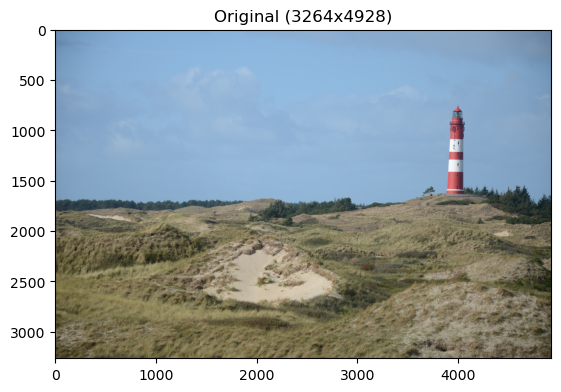

In [2]:
#image file name
infile='images/Amrum.png'

# load image with PIL library, convert to numpy array
image = PIL.Image.open(infile)
image_arr = np.asarray(image)
print (type(image_arr),image_arr.dtype,image_arr.ndim,image_arr.shape)

# show image
fig,axs = plt.subplots(1,1)
axs.set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs.imshow(image_arr)

----
## Remove alpha channel and convert to sRGB grayscale

(see previous notebook)

(3264, 4928) 131


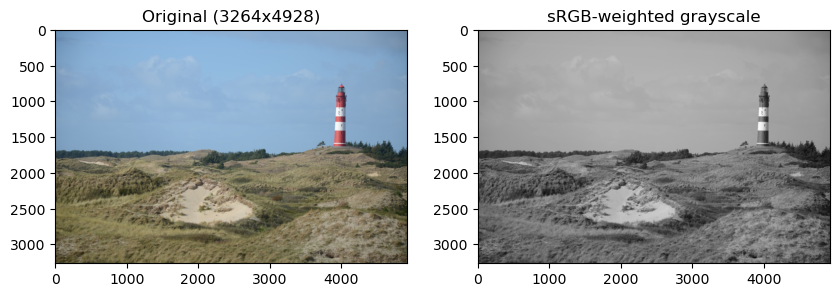

In [3]:
image_gray2 = np.zeros_like(image_arr[:,:,0])
image_gray2[:,:] = (0.2126*image_arr[:,:,0]
                    +0.7152*image_arr[:,:,1]
                    +0.0722*image_arr[:,:,2]).astype(int)
print(image_gray2.shape,image_gray2[0][0])

# show image
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Original ('+str(image_arr.shape[0])+'x'+str(image_arr.shape[1])+')')
axs[0].imshow(image_arr)
axs[1].set_title('sRGB-weighted grayscale')
axs[1].imshow(image_gray2,cmap='gray')

----
## Image-processing kernels

[see wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing))

A large group of image filters is based on **filter kernel functions** $\omega(a,b)$,
which are shifted over the original image $A(nx,ny)$ with a 2D convolution:
$$
B(x,y)= \omega A(x,y)=\sum_{dx=-a}^a{\sum_{dy=-b}^b{ \omega (dx,dy)A(x-dx,y-dy)}}
$$

Th double sum, a 2D convolution of function $\omega$ and $A$, can be performed by using the
`convolution` function from the `scipy.ndimage` library.

**Note:** Handing the edges of an image can be achieved in the `convolution` function
with the `mode` keyword.

### Identity kernel
A simple kernel function is the **identity kernel**, defined as
$$
\omega = \left[
\begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right]
$$
It maps the original image $A$ onto the same image $B$.

In [4]:
identity = np.array([[0,0,0],[0,1,0],[0,0,0]])
print(identity)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


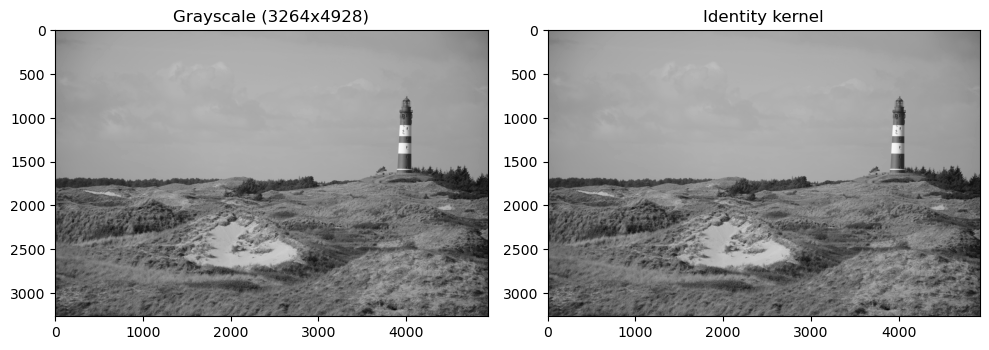

In [5]:
image_identity = scipy.ndimage.convolve(image_gray2, identity, mode='constant')

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Grayscale ('+str(image_gray2.shape[0])+'x'+str(image_gray2.shape[1])+')')
axs[0].imshow(image_gray2,cmap='gray')
axs[1].set_title('Identity kernel')
axs[1].imshow(image_identity,cmap='gray')
plt.tight_layout()

### Sharpen kernel
A simple kernel function is the **sharpen kernel**, defined as
$$
\omega = \left[
\begin{array}{ccc}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{array}
\right]
$$
It maps the original image $A$ onto the sharpened image $B$.

In [6]:
sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
print(sharpen)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


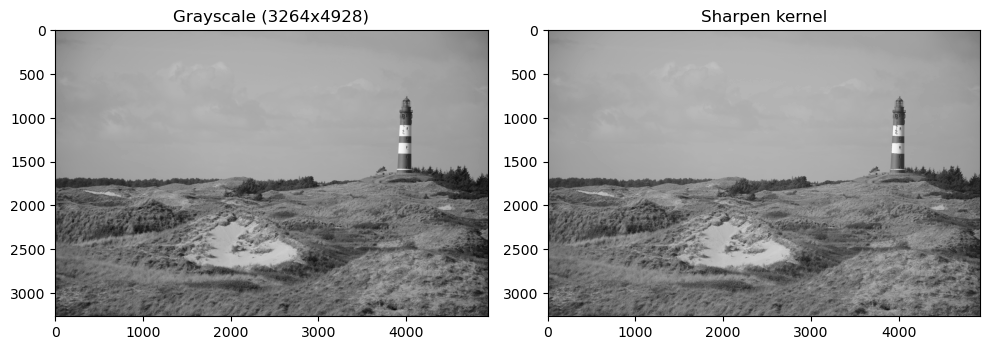

In [7]:
image_sharpen = scipy.ndimage.convolve(image_gray2, sharpen, mode='constant')

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Grayscale ('+str(image_gray2.shape[0])+'x'+str(image_gray2.shape[1])+')')
axs[0].imshow(image_gray2,cmap='gray')
axs[1].set_title('Sharpen kernel')
axs[1].imshow(image_sharpen,cmap='gray')
plt.tight_layout()

### Blur kernel
A simple kernel function is the **blur kernel**, defined as
$$
\omega = \frac{1}{9} \left[
\begin{array}{ccc}
1&1&1 \\
1&1&1 \\
1&1&1 \\
\end{array}
\right]
$$
It maps the original image $A$ onto the blurred image $B$.

In [8]:
blur = np.array([[1,1,1],[1,1,1],[1,1,1]])
blur=blur/9
print(blur)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


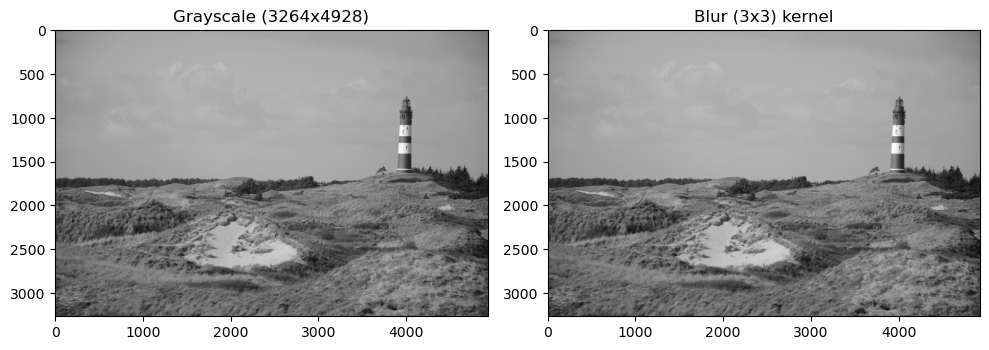

In [9]:
image_blur = scipy.ndimage.convolve(image_gray2, blur, mode='reflect')

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Grayscale ('+str(image_gray2.shape[0])+'x'+str(image_gray2.shape[1])+')')
axs[0].imshow(image_gray2,cmap='gray')
axs[1].set_title('Blur (3x3) kernel')
axs[1].imshow(image_blur,cmap='gray')
plt.tight_layout()

### Edge kernel
Another kernel function is the **edge kernel**, defined as
$$
\omega = \left[
\begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8  & -1 \\
-1 & -1 & -1 \\
\end{array}
\right]
$$
It emphazises edges from the original image $A$ onto an image $B$.

In [10]:
edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
print(edge)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


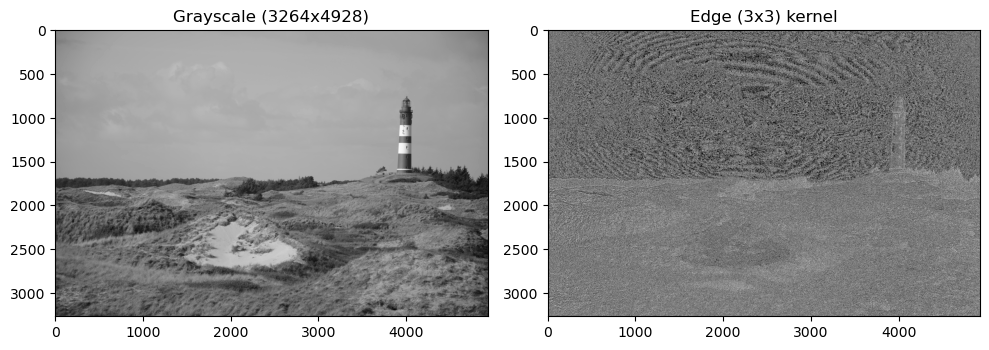

In [11]:
image_edge = scipy.ndimage.convolve(image_gray2, edge, mode='reflect')

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Grayscale ('+str(image_gray2.shape[0])+'x'+str(image_gray2.shape[1])+')')
axs[0].imshow(image_gray2,cmap='gray')
axs[1].set_title('Edge (3x3) kernel')
axs[1].imshow(image_edge,cmap='gray')
plt.tight_layout()

----